# Week4 Simple Linear Regression
## 背景描述
纸制品的**抗拉强度**与**纸浆中硬木的含量**有关。在试验工厂生产了10个样品。

## 数据描述
| 变量名 | 变量含义 | 变量类型 | 变量取值范围 |
| :----------: | :--------: | :----------: | :----------: |
| （自变量）Percent_Hardwood | 硬木含量 | discrete variable | $\mathbb{Z}^+$ |
| （因变量）Strength | 抗拉强度 | continuous variable | $\mathbb{R}$ |



In [1]:
import pandas as pd
print('Data: \n', pd.read_csv('Project4.csv').values)

Data: 
 [[  1  10 160]
 [  2  15 171]
 [  3  15 175]
 [  4  20 182]
 [  5  20 184]
 [  6  20 181]
 [  7  25 188]
 [  8  25 193]
 [  9  28 195]
 [ 10  30 200]]


## 问题
注：这里使用 $\alpha=0.05$ 的显著性水平

1. 请用统计模型描述**纸浆中硬木的含量**与纸制品的**抗拉强度**的关系.
2. 请问Q1中所建立的模型是否合理.
3. 如果需要纸制品的硬木含量为 18，请给出一个合理区间，预测纸制品的**抗拉强度**应为多少.

## 解决方案

**Q1:** 

使用一元线性回归的方法，列出线性模型为：$Strength = \beta_0 + \beta_1*Percent\ Hardwood + \epsilon$

In [2]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f
from scipy.stats import t

alpha = 0.05
n = 10

x = pd.read_csv('Project4.csv')
data = x.values[:,1:3]
df = pd.DataFrame(data, columns = ['Percent_Hardwood', 'Strength'])
print(df.head())
print('\n')
print(np.var(data[:,0]))

# Do the simple linear regression
model = ols('Strength ~ Percent_Hardwood', df).fit()
beta = model.params
print('参数估计值: \n', round(beta, 4))
model.summary()


   Percent_Hardwood  Strength
0                10       160
1                15       171
2                15       175
3                20       182
4                20       184


35.76
参数估计值: 
 Intercept           143.8244
Percent_Hardwood      1.8786
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     260.0
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           2.20e-07
Time:                        13:39:47   Log-Likelihood:                -20.973
No. Observations:                  10   AIC:                             45.95
Df Residuals:                       8   BIC:                             46.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          143.8244      2.522     57.039      0.000     138.010     149.639
Percent_Hardwood     1.8786      0.117     16.125      0.000       1.610       2.147
==============================================================================
Omnibus:                        1.211   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                0.701
Skew:                           0.157   Prob(JB):                        0.704
Kurtosis:                       1.742   Cond. No.                         78.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Strength_hat = 143.8244 + 1.8786 * Percent_Hardwood


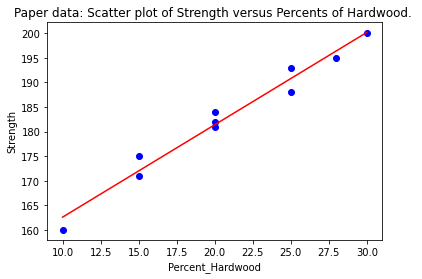

In [3]:
# 输出一元线性回归方程
print('Strength_hat =', round(beta[0], 4), '+', round(beta[1], 4), '* Percent_Hardwood')

# 画图
x = data[:, 0]
y = data[:, 1]
Y = model.fittedvalues   # 预测值
plt.scatter(x, y, c = 'blue', label='Strength') # 原始数据
plt.plot(x, Y, 'red', label='Fit_minutes') # 拟合数据
plt.title('Paper data: Scatter plot of Strength versus Percents of Hardwood. ')
plt.xlabel('Percent_Hardwood')
plt.ylabel('Strength')
plt.show()

由此可知，该线性回归模型为：$Strength = 143.82 + 1.88 * Percent\ Hardwood$

**Q2:**  
本题要求对一元线性回归模型进行显著性检验。检验方法包括F检验、t检验和相关系数的检验。在一元线性回归模型的条件下，这三种检验方法是等价的。检验假设：$H_0: \beta_1=0$ vs $H_1: \beta_1 \neq 0$。此外，也可通过残差分析来检测模型的合理性。

In [4]:
# 求解相关项
x_mean = np.mean(data[:, 0])  # 自变量 x 的均值
y_mean = np.mean(data[:, 1])  # 因变量 y 的均值
sigma2 = sum((y - beta[0] - beta[1] * x) ** 2) / (n - 2)  # 方差
sigma = np.sqrt(sigma2)  # 标准差
lxx = sum((x - np.mean(x)) ** 2)  # 求l_xx
lyy = sum((y - np.mean(y)) ** 2)  # 求l_yy
lxy = sum((x - np.mean(x)) * (y - np.mean(y)))  # 求l_xy

**一元线性模型的显著性检验——F 检验:**

In [5]:
# F检验
anova_results = round(anova_lm(model), 2)
print('The ANOVA table: \n', anova_results)

# 法1：
pVal1 = anova_results['PR(>F)'][0]
if pVal1 < alpha:
    print('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.') 
    
# 法2：
F0 = anova_results['F'][0]
F = round(f.ppf(1 - alpha, dfn = 1,dfd = n - 2), 2)
if F0 > F:
    print('Since F0 > F(0.95, 1, 8) = ', F, ', reject H0.')
else:
    print('Accept H0.') 

The ANOVA table: 
                    df   sum_sq  mean_sq      F  PR(>F)
Percent_Hardwood  1.0  1262.07  1262.07  260.0     0.0
Residual          8.0    38.83     4.85    NaN     NaN

Since p-value < 0.05, reject H0.
Since F0 > F(0.95, 1, 8) =  5.32 , reject H0.


**一元线性模型的显著性检验——t 检验:**

In [6]:
# t检验
t0 = beta[1] * np.sqrt(lxx) / sigma  # 求t值
print('t0值为：', round(t0, 4))
tVal = t.ppf(1 - alpha / 2, n - 2)  # 分位点函数（CDF的逆）
print('t的临界值为：', round(tVal, 4))
pVal2 = t.sf(t0, n - 2)  # 用残存函数（1-CDF）求p值 
# pVal2 = 1 - t.cdf(t0, n - 2)
print('P值为：', round(pVal2, 4))

# 法1：
if pVal2 < alpha:
    print ('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.')
    
# 法2：
if abs(t0) > tVal:
    print('Since t0 > t(0.975,8) = ', round(tVal, 4), ', reject H0.')
else:
    print('Accept H0.') 

t0值为： 16.1245
t的临界值为： 2.306
P值为： 0.0

Since p-value < 0.05, reject H0.
Since t0 > t(0.975,8) =  2.306 , reject H0.


**相关系数的检验:**  
检验假设：$H_0: \rho=0$ vs $H_1: \rho \neq 0$

In [7]:
# 相关系数检验
# 法1：代公式求得
r1 = lxy / np.sqrt(lxx * lyy)
print('法 1 求得的相关系数：', round(r1, 4))

# 法2：用pandas中DataFrame对象corr()方法
r2 = df.corr()
print('法 2 求得的相关系数：\n', round(r2, 4))

rVal = np.sqrt(F / (F + (n - 2)))
if abs(r1) > rVal:
    print ('\nSince r > r(0.975, 8) = ', round(rVal, 4), ', reject H0.')
else:
    print('\nAccept H0.')


法 1 求得的相关系数： 0.985
法 2 求得的相关系数：
                   Percent_Hardwood  Strength
Percent_Hardwood             1.000     0.985
Strength                     0.985     1.000

Since r > r(0.975, 8) =  0.632 , reject H0.


由此可知，Q1中所建立的模型是合理的。

**残差分析0: 计算维修服务时长的残差**

In [8]:
# 计算维修服务时长的残差
data_res = data * 1
for i in range(n):
    data_res[:,1] = y - Y
df = pd.DataFrame(data_res, columns = ['Units', 'Minutes_res'])
print(df.head())

   Units  Minutes_res
0     10           -2
1     15           -1
2     15            2
3     20            0
4     20            2


**残差分析1: 残差的正态概率图** 

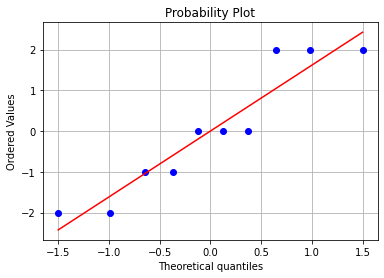

In [9]:
# 残差的正态概率图
res = data_res[:, 1]
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
plt.grid()
plt.show()

**残差分析2: 残差与拟合值的关系图**  

Text(0, 0.5, 'e_i')

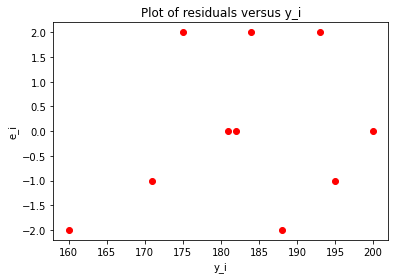

In [10]:
# 残差与预测值的关系图
plt.scatter(data[:,1], res, c = 'red')
plt.title('Plot of residuals versus y_i')
plt.xlabel('y_i')
plt.ylabel('e_i')

由以上残差分析的结果可知，残差大致符合正态分布，具有一定的正态性。同时，通过残差与预测值关系图也可以看出残差与预测值之间没有明显的相关性。所以认为Q1中建立的模型是合理的。

**Q3:**

本题需要使用估计与预测的方法确定预测得到的抗拉强度。可以使用$E(y_0)$ 的估计或$y_0$的预测区间作为抗拉强度的大致区间。

**关于 $E(y_0)$ 的估计:**

In [11]:
# 给定 x_0，求 E(y_0) 的估计值
def confidence_interval(x0):
    Y0 = beta[0] + beta[1] * float(x0)
    delta0 = tVal * sigma * np.sqrt(1 / n + (float(x0) - x_mean) ** 2 / lxx)
    Y0_int = [Y0 - delta0, Y0 + delta0]
    return Y0_int

x0 = input()
print('给定 x = %d, E(y_0) 的置信区间：'%int(x0), np.round(confidence_interval(x0), 4))

18
给定 x = 18, E(y_0) 的置信区间： [175.8658 179.4138]


**关于 $y_0$ 的预测:**

In [12]:
# 给定 x_0，求 y_0 的预测区间
def confidence_interval(x0):
    Y0 = beta[0] + beta[1] * float(x0)
    delta1 = tVal * sigma * np.sqrt(1 + 1 / n + (float(x0) - x_mean) ** 2 / lxx)
    Y0_int = [Y0 - delta1, Y0 + delta1]
    return Y0_int

x00 = input()
print('给定 x = %d, y_0 的预测区间：'%int(x00), np.round(confidence_interval(x0), 4))

18
给定 x = 18, y_0 的预测区间： [172.2584 183.0212]


由于计算公式不同，计算得到的$y_0$的预测区间要略宽于$E[y_0]$的置信区间。这里采用$y_0$的预测区间作为预测得到的抗拉强度，即$[172.26,\ 183.02]$。